# Diabetes Prediction using Decision Tree from sklearn and generating Confusion Matrix using Tensorflow and Tabulate

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree
from sklearn.metrics import classification_report
from tensorflow.math import confusion_matrix as cm
import warnings
warnings.filterwarnings("ignore")


In [2]:
#creating the dataframe for the dataset
data_frame = pd.read_csv('./diabetes_predictions/diabetes_prediction_dataset_dirtyset.csv')


In [3]:
#displaying the dataframe
data_frame


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1,never,25.19,6.6,140,0
1,Female,54.0,0.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0.0,0,never,27.32,5.7,158,0
3,Female,36.0,0.0,0,current,23.45,5.0,155,0
4,Male,76.0,1.0,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0.0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0.0,0,former,27.83,5.7,155,0
99998,Female,24.0,0.0,0,never,35.42,4.0,100,0


In [4]:
#get full details of attributes and their instances before preprocessing
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  99999 non-null   float64
 2   hypertension         99999 non-null   float64
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      99999 non-null   object 
 5   bmi                  99999 non-null   float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


In [5]:
#check for any null values or NAN before preprocessing
data_frame.isna().sum()


gender                 0
age                    1
hypertension           1
heart_disease          0
smoking_history        1
bmi                    1
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
#applying preprocessing to replace missing values using mean
data_frame = data_frame.interpolate()


In [7]:
#check for any null values or NAN after preprocessing
data_frame.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        1
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
#get full details of attributes and their instances after preprocessing
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  float64
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      99999 non-null   object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


In [9]:
#displaying the dataframe after preprocessing
data_frame


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1,never,25.19,6.6,140,0
1,Female,54.0,0.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0.0,0,never,27.32,5.7,158,0
3,Female,36.0,0.0,0,current,23.45,5.0,155,0
4,Male,76.0,1.0,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0.0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0.0,0,former,27.83,5.7,155,0
99998,Female,24.0,0.0,0,never,35.42,4.0,100,0


In [10]:
#using ffill to replace missing value with next value in the column of the object type attribute
data_frame = data_frame.interpolate('ffill')


In [11]:
#get full details of attributes and their instances after ffill
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  float64
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


In [12]:
#check for any null values or NAN after ffill
data_frame.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
#displaying the dataframe after ffill
data_frame


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1,never,25.19,6.6,140,0
1,Female,54.0,0.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0.0,0,never,27.32,5.7,158,0
3,Female,36.0,0.0,0,current,23.45,5.0,155,0
4,Male,76.0,1.0,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0.0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0.0,0,former,27.83,5.7,155,0
99998,Female,24.0,0.0,0,never,35.42,4.0,100,0


In [14]:
data_frame.to_csv('./diabetes_predictions/diabetes_prediction_preprocessed_dataset.csv')


In [15]:
#coverting the gender column from string to float datatype
data_frame['gender'] = data_frame['gender'].replace(to_replace='Female',value=0.0)
data_frame['gender'] = data_frame['gender'].replace(to_replace='Male',value=1.0)
data_frame['gender'] = data_frame['gender'].replace(to_replace='Other',value=2.0)

#coverting the smoking_history column from string to float datatype
data_frame['smoking_history'] = data_frame['smoking_history'].replace(to_replace='No Info',value=0.0)
data_frame['smoking_history'] = data_frame['smoking_history'].replace(to_replace='never',value=1.0)
data_frame['smoking_history'] = data_frame['smoking_history'].replace(to_replace='former',value=2.0)
data_frame['smoking_history'] = data_frame['smoking_history'].replace(to_replace='not current',value=3.0)
data_frame['smoking_history'] = data_frame['smoking_history'].replace(to_replace='current',value=4.0)
data_frame['smoking_history'] = data_frame['smoking_history'].replace(to_replace='ever',value=5.0)


In [16]:
#displaying dataset after replacing missing values
data_frame

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0.0,1,1.0,25.19,6.6,140,0
1,0.0,54.0,0.0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0.0,0,1.0,27.32,5.7,158,0
3,0.0,36.0,0.0,0,4.0,23.45,5.0,155,0
4,1.0,76.0,1.0,1,4.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0.0,0,0.0,27.32,6.2,90,0
99996,0.0,2.0,0.0,0,0.0,17.37,6.5,100,0
99997,1.0,66.0,0.0,0,2.0,27.83,5.7,155,0
99998,0.0,24.0,0.0,0,1.0,35.42,4.0,100,0


In [17]:
#details after handling missing values
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  float64
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  float64
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 6.9 MB


<Axes: >

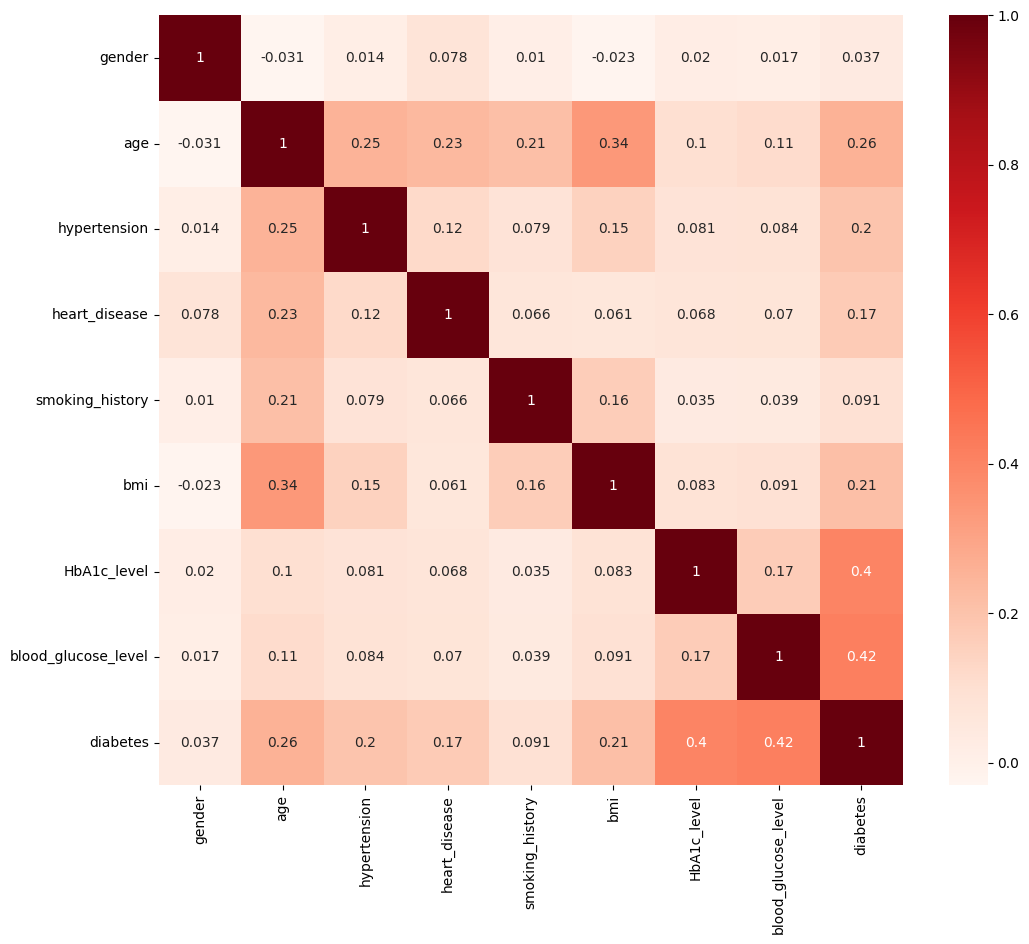

In [18]:
# finding relevancy with target attribute
# correlation using pearson correlation

plt.figure(figsize=(12,10))
co_relation = data_frame.corr()
sb.heatmap(co_relation,annot=True,cmap=plt.cm.Reds)


In [19]:
# displaying the correlation with the target attribute
co_relation_with_target = abs(co_relation["diabetes"])
co_relation_with_target


gender                 0.037411
age                    0.258010
hypertension           0.197823
heart_disease          0.171727
smoking_history        0.090990
bmi                    0.214362
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

In [20]:
# selecting highly correlated attributes (correlation>0.2)
highly_relavant_features = co_relation_with_target[co_relation_with_target>0.20]
highly_relavant_features


age                    0.258010
bmi                    0.214362
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

In [21]:
#dropping unrelevant attributes
data_frame.drop(['gender','hypertension','heart_disease','smoking_history'],axis=1,inplace=True)
#data_frame.drop(['gender','hypertension','bmi','heart_disease','smoking_history'],axis=1,inplace=True)
#data_frame.drop(['gender','heart_disease','smoking_history'],axis=1,inplace=True)

# dataframe after dropping the unrelevant attributes
data_frame


,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,25.19,6.6,140,0
1,54.0,27.32,6.6,80,0
2,28.0,27.32,5.7,158,0
3,36.0,23.45,5.0,155,0
4,76.0,20.14,4.8,155,0
...,...,...,...,...,...
99995,80.0,27.32,6.2,90,0
99996,2.0,17.37,6.5,100,0
99997,66.0,27.83,5.7,155,0
99998,24.0,35.42,4.0,100,0


In [22]:
# getting the index of class labels
index = len(data_frame.columns)-1
index

4

In [23]:
#saving the selected dataset
data_frame.to_csv('./diabetes_predictions/diabetes_prediction_selected_dataset.csv')

In [24]:
# storing all attributes's instances as arrays from data frame 
data_array = data_frame[data_frame.columns[:index]].to_numpy()

In [25]:
# from dataframe to array for data
data_array

array([[ 80.  ,  25.19,   6.6 , 140.  ],
       [ 54.  ,  27.32,   6.6 ,  80.  ],
       [ 28.  ,  27.32,   5.7 , 158.  ],
       ...,
       [ 66.  ,  27.83,   5.7 , 155.  ],
       [ 24.  ,  35.42,   4.  , 100.  ],
       [ 57.  ,  22.43,   6.6 ,  90.  ]])

In [26]:
# storing all target values as arrays from data frame 
target_array = data_frame['diabetes'].to_numpy()

In [27]:
# from dataframe to array for target class
target_array

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Training the DT algorithm

In [28]:
# creating an instances of the DT tree algorithm
algorithm_dtree = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

In [29]:
#training algorithm with datasets to create a ml model
classifier = algorithm_dtree.fit(data_array,target_array)

In [30]:
#displaying the classifier using text representation
text_representation = tree.export_text(classifier)
print(text_representation)


|--- feature_2 <= 6.70
|   |--- feature_3 <= 210.00
|   |   |--- feature_2 <= 5.35
|   |   |   |--- class: 0
|   |   |--- feature_2 >  5.35
|   |   |   |--- feature_0 <= 42.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  42.50
|   |   |   |   |--- class: 0
|   |--- feature_3 >  210.00
|   |   |--- class: 1
|--- feature_2 >  6.70
|   |--- class: 1



In [31]:
#print(np.asarray(data_frame.columns))

In [32]:
#extracting the names of only the attributes
data_frame_columns = []

for i in data_frame.columns[0:index]:
    #print(i)
    data_frame_columns.append(i)

print(type(data_frame_columns))
#print(type([data_frame.columns[index]]))
#print([data_frame.columns[index]])


<class 'list'>


In [33]:
#data_attributes = data_frame_columns
data_frame_columns = np.asarray(data_frame_columns)
target_name = np.asarray(['Non-Diabetes','Diabetes'])


In [34]:
#print(type(data_frame_columns))
#print(target_name)
#print(data_frame_columns)

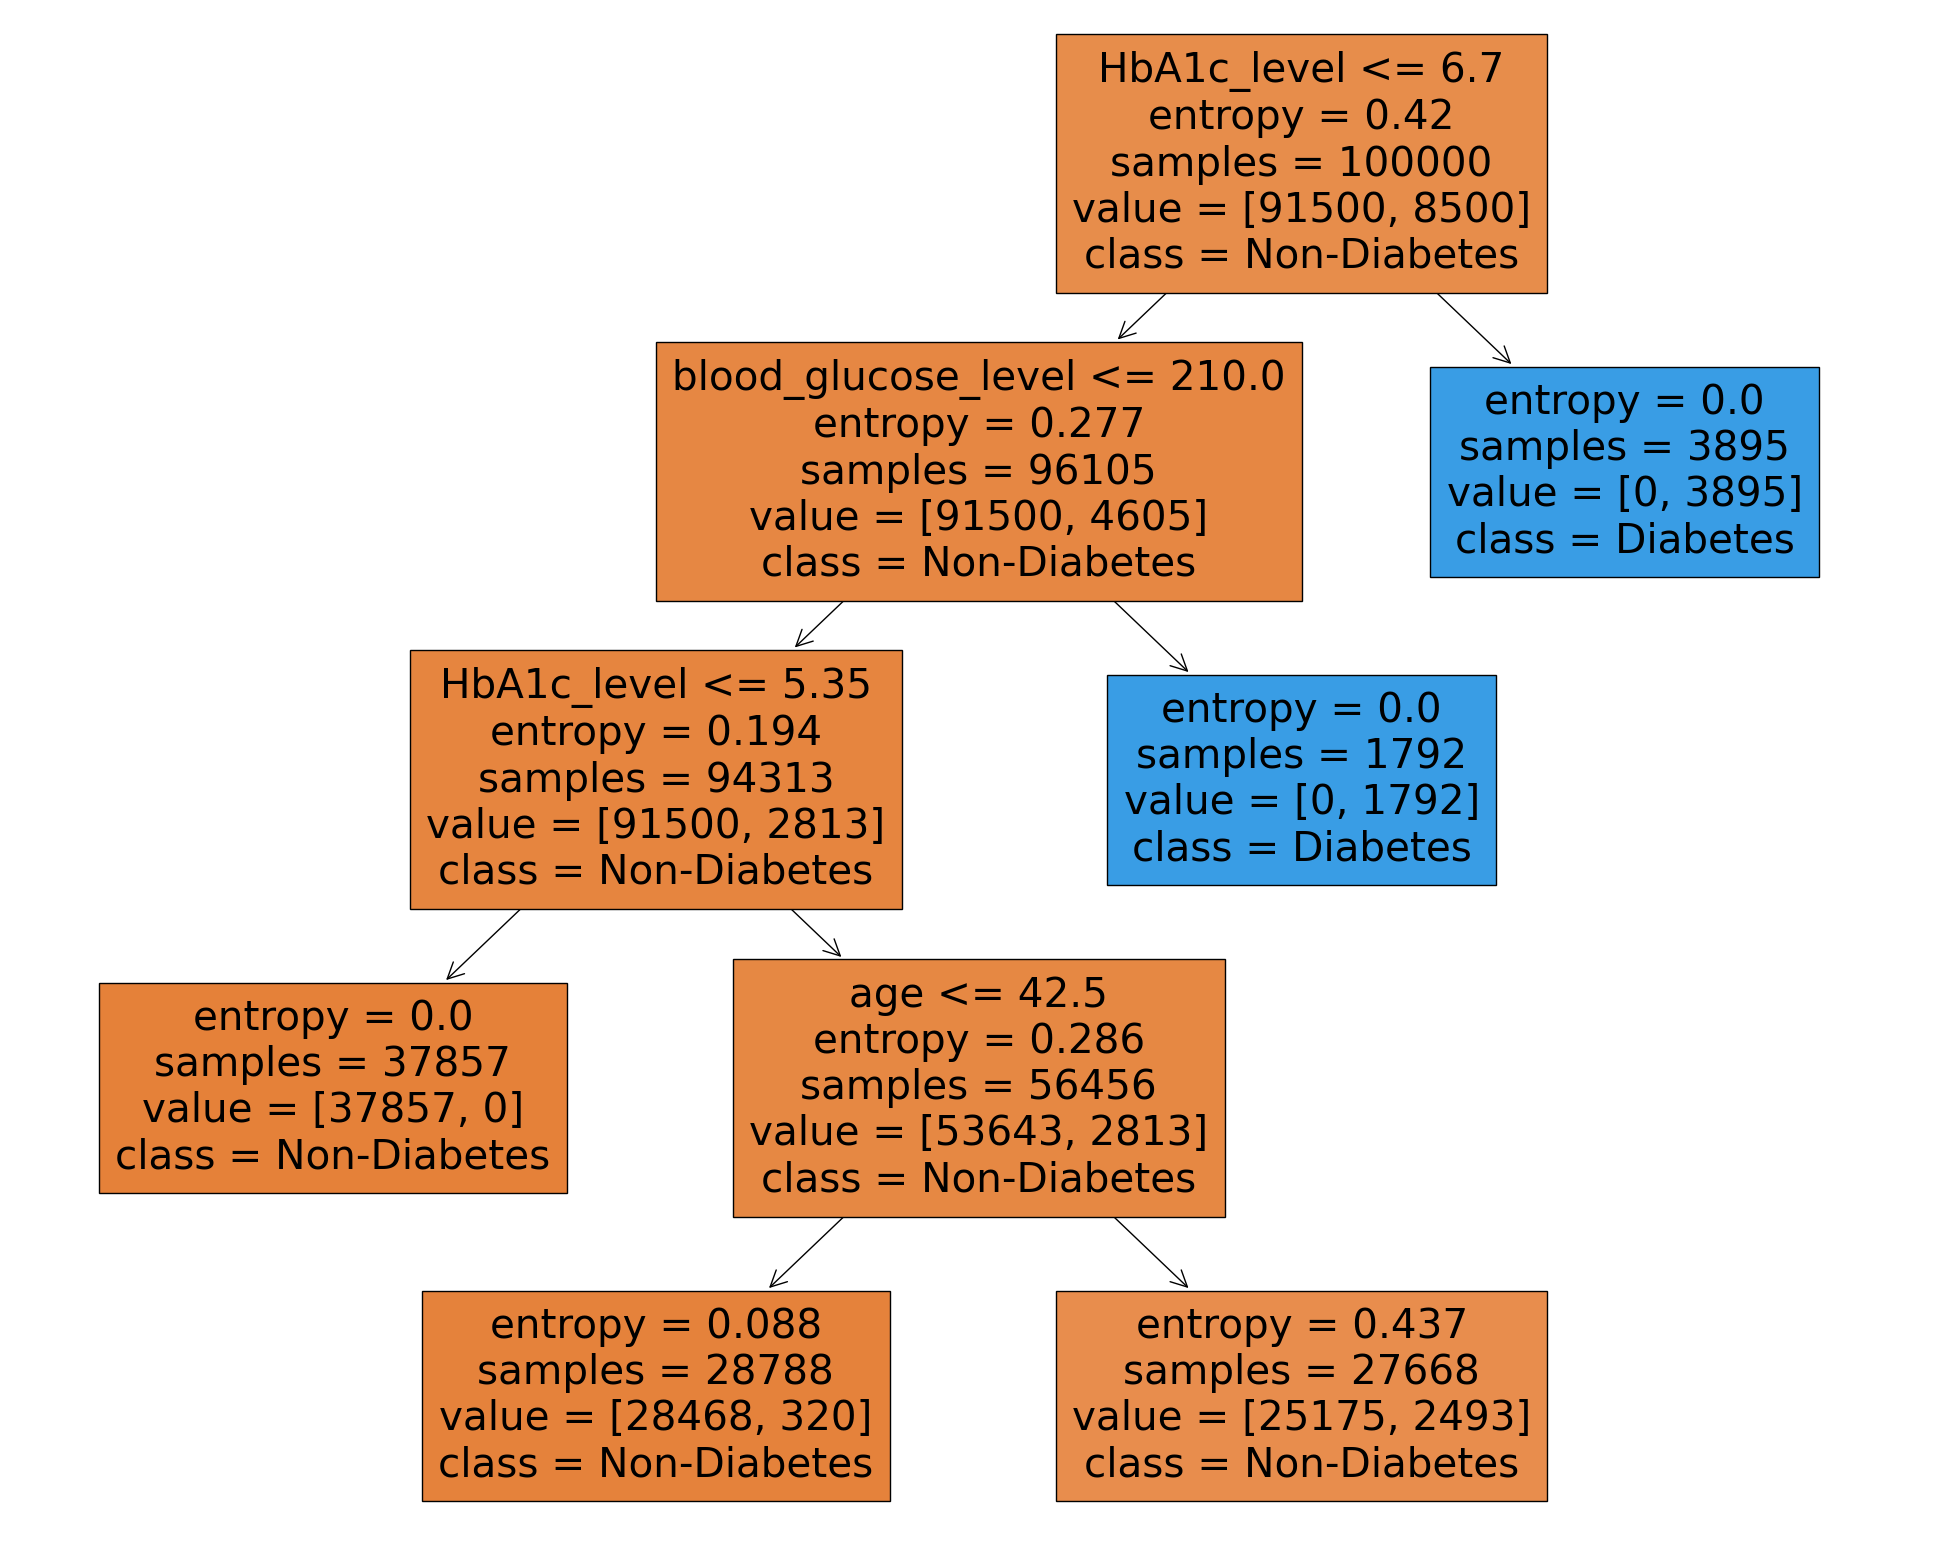

In [35]:
#plotting the tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=data_frame_columns,  
                   class_names=target_name,
                   filled=True)


In [36]:
#saving model as a png
fig.savefig("decision tree.png")


# Testing the DT Model

In [37]:
#testing the decision tree model
actual_class_value = []
actual_class = []
test_data_matrix = []
predicted_class_value = []
predicted_class = []
k = 0

test_data = [[[87.0,22.19,6.2,120.0,0.0]],[[100.52,32.19,8.2,180.0,1.0]],[[77.0,28.19,4.2,80.0,1.0]]]

for x in test_data:
    actual_class_value.append(x[0].pop(-1))
    
    if(actual_class_value == 0.0):
        actual_class.append("Non-Diabetic")
    else:
        actual_class.append("Diabetic")
        
    test_data_matrix.append(np.asarray(actual_class_value[k]))
    
    #predicted_value.append(np.asarray(classifier.predict(test_data[k])))
    predicted_class_value.append(classifier.predict(test_data[k]))
    #print(predicted_value[k])
    k = k + 1

for y in range(len(predicted_class_value)):
    print("Predicted Value for test data {} = {}".format(y+1,float(predicted_class_value[y][0])))

    if(float(predicted_class_value[y][0]) == 0.0):
        predicted_class.append("Non-Diabetic")
    else:
        predicted_class.append("Diabetic")

    print("Result for testdata {} => Diagonsed as {}".format(y+1,predicted_class[y]))
    print(" ")


Predicted Value for test data 1 = 0.0
Result for testdata 1 => Diagonsed as Non-Diabetic
 
Predicted Value for test data 2 = 1.0
Result for testdata 2 => Diagonsed as Diabetic
 
Predicted Value for test data 3 = 0.0
Result for testdata 3 => Diagonsed as Non-Diabetic
 


# Confusion matrix from tensorflow and tabulate


In [38]:
#type casting the predicted value into int type
n = []
for m in predicted_class_value:
    n.append(m[0])
    

In [39]:
#confusion matrix for the predicted and actual value
cm_matrix = cm(actual_class_value,n)
print(cm_matrix)


tf.Tensor(
[[1 0]
 [1 1]], shape=(2, 2), dtype=int32)


In [40]:
#creating confusion matrix table
from tabulate import tabulate

grid_data = [[" "," ",0,1,]]
table_vertical_label = ["Actual","Values"]

for a in range(2):
    for b in range(1):
        grid_data.append([table_vertical_label[a],a,float(cm_matrix[a][b]),float(cm_matrix[a][b+1])])
#print(grid_data)

prediction_head = ["Predicted","Values"]

#display table
print("Confusion matrix using tensorflow and tabulate")
print(tabulate(grid_data, headers=prediction_head, tablefmt="grid"))


Confusion matrix using tensorflow and tabulate
+--------+----+-------------+----------+
|        |    |   Predicted |   Values |
+========+====+=============+==========+
|        |    |           0 |        1 |
+--------+----+-------------+----------+
| Actual | 0  |           1 |        0 |
+--------+----+-------------+----------+
| Values | 1  |           1 |        1 |
+--------+----+-------------+----------+


# Evaluation Metrices for the decision tree classifier

In [41]:
# evaluation using performance metrices
print(classification_report(actual_class,predicted_class))


              precision    recall  f1-score   support

    Diabetic       1.00      0.33      0.50         3
Non-Diabetic       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3

